In [24]:

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

ticker = 'DJI'  # Ticker symbol for Dow Jones
start_date = '2000-01-01'  # Start date for the historical data
end_date = '2024-01-31'  # End date for the historical data

DJI_df0 = yf.download(ticker, start=start_date, end=end_date)
DJI_df0.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,11357.500000,11357.500000,11357.500000,11357.500000,11357.500000,0
2000-01-04,10997.900391,10997.900391,10997.900391,10997.900391,10997.900391,0
2000-01-05,11122.700195,11122.700195,11122.700195,11122.700195,11122.700195,0
2000-01-06,11253.299805,11253.299805,11253.299805,11253.299805,11253.299805,0
2000-01-07,11522.599609,11522.599609,11522.599609,11522.599609,11522.599609,0


In [25]:
DJI_df0.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [26]:
DJI_df0.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [27]:
DJI_df0.isnull().sum() # checking missing values i.e. NaN values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [28]:
DJI_df0.shape # shape of the dataframe

(5405, 6)

In [29]:
DJI_df0.describe() #basic statistics


,Open,High,Low,Close,Adj Close,Volume
count,5405.000000,5405.000000,5405.000000,5405.000000,5405.000000,5.405000e+03
mean,15301.326939,15305.156246,15296.961629,15301.223146,15301.223146,3.866542e+07
std,6904.788584,6910.094014,6898.799658,6904.610201,6904.610201,9.073078e+07
min,6547.049805,6547.049805,6547.049805,6547.049805,6547.049805,0.000000e+00
25%,10470.700195,10470.700195,10470.700195,10470.700195,10470.700195,0.000000e+00
50%,12447.500000,12447.500000,12447.500000,12447.500000,12447.500000,0.000000e+00
75%,17912.599609,17912.599609,17912.599609,17912.599609,17912.599609,0.000000e+00
max,36799.699219,36799.699219,36799.699219,36799.699219,36799.699219,7.582325e+08


In [30]:
DJI_df0.max()

Open         3.679970e+04
High         3.679970e+04
Low          3.679970e+04
Close        3.679970e+04
Adj Close    3.679970e+04
Volume       7.582325e+08
dtype: float64

In [31]:
DJI_df0.min()

Open         6547.049805
High         6547.049805
Low          6547.049805
Close        6547.049805
Adj Close    6547.049805
Volume          0.000000
dtype: float64

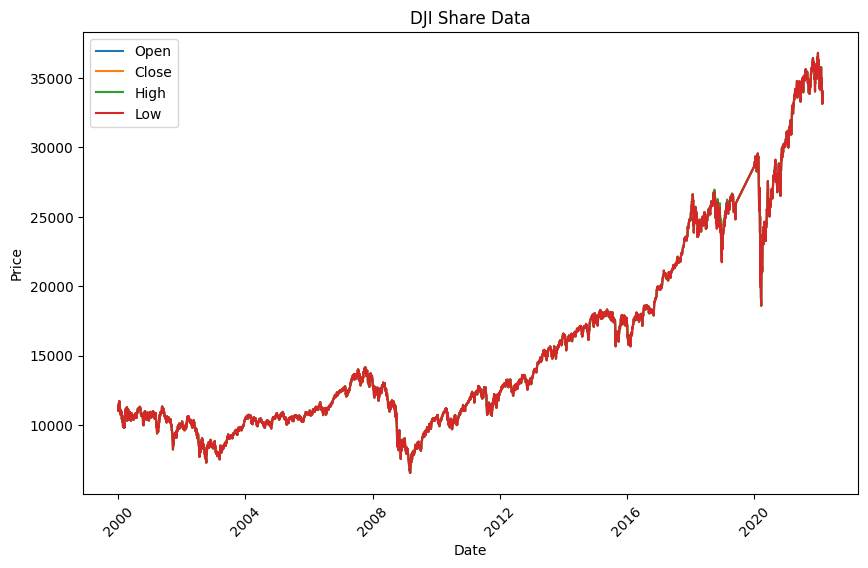

In [32]:
# If date is not datetime format then Convert the 'Date' column to datetime type using
# DJI_df['Date'] = pd.to_datetime(DJI_df['Date'])

# Set the figure size
plt.figure(figsize=(10, 6))
# Plot 'Open' price
sns.lineplot(x='Date', y='Open', data=DJI_df0, label='Open')

# Plot 'Close' price
sns.lineplot(x='Date', y='Close', data=DJI_df0, label='Close')

# Plot 'High' price
sns.lineplot(x='Date', y='High', data=DJI_df0, label='High')

# Plot 'Low' price
sns.lineplot(x='Date', y='Low', data=DJI_df0, label='Low')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('DJI Share Data')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend()

# Show the plot
plt.show()

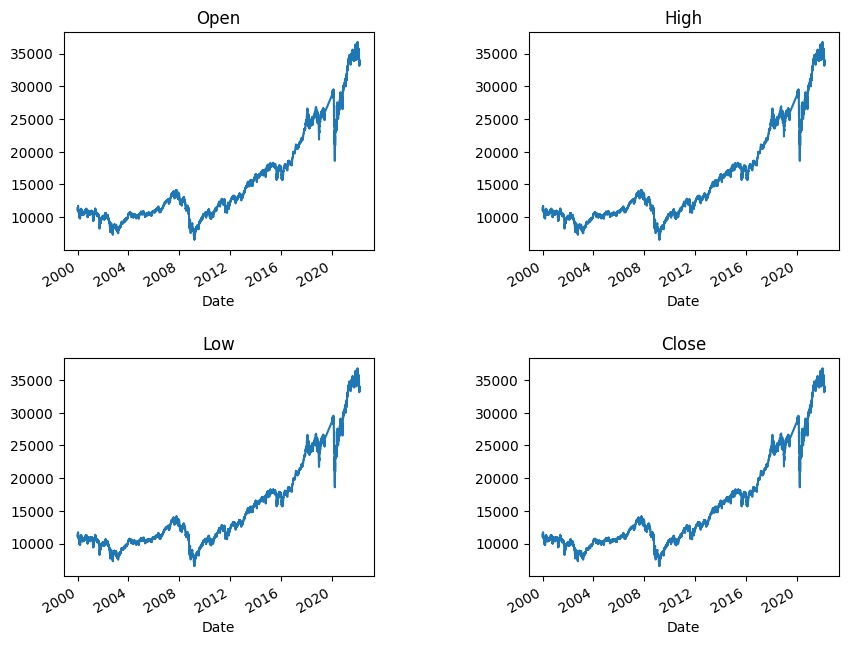

In [34]:
# we can also plot all four in separate subfigures in a single figure

# For duration 2000-2024
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
DJI_df0['Open'].plot(ax=ax[0,0], title= 'Open') # type: ignore
DJI_df0['High'].plot(ax=ax[0,1], title= 'High') # type: ignore
DJI_df0['Low'].plot(ax=ax[1,0], title= 'Low') # type: ignore
DJI_df0['Close'].plot(ax=ax[1,1], title= 'Close') # type: ignore
# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.5, hspace=0.5)

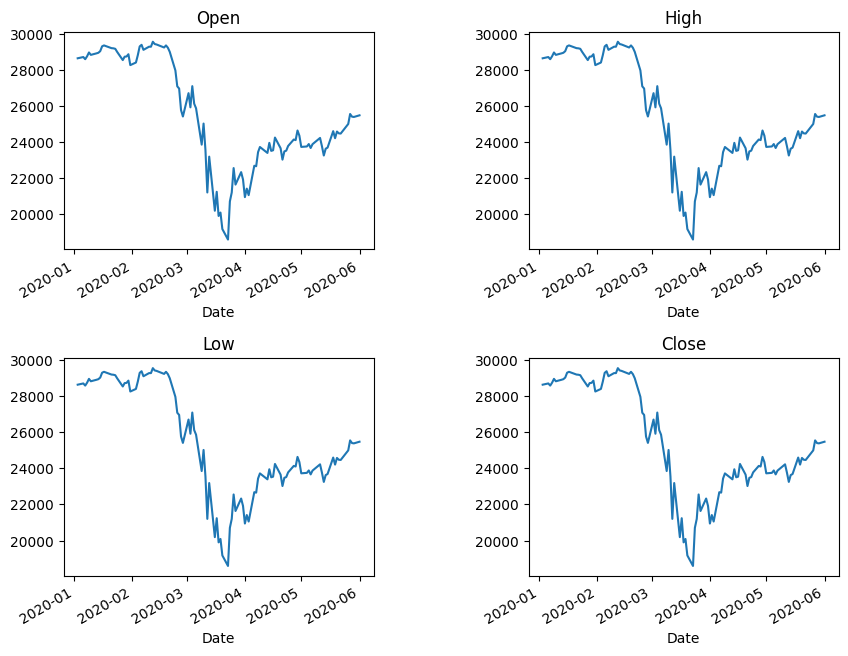

In [39]:
# we can also plot all four in separate subfigures in a single figure

# For duration 2000-2024
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
DJI_df0['Open'].loc['2020-01-01':'2020-06-01'].plot(ax=ax[0,0], title= 'Open') # type: ignore
DJI_df0['High'].loc['2020-01-01':'2020-06-01'].plot(ax=ax[0,1], title= 'High') # type: ignore
DJI_df0['Low'].loc['2020-01-01':'2020-06-01'].plot(ax=ax[1,0], title= 'Low') # type: ignore
DJI_df0['Close'].loc['2020-01-01':'2020-06-01'].plot(ax=ax[1,1], title= 'Close') # type: ignore
# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.5, hspace=0.5)

**so in last 6 months, Dow Jones Index did not perform well for this period of time.**

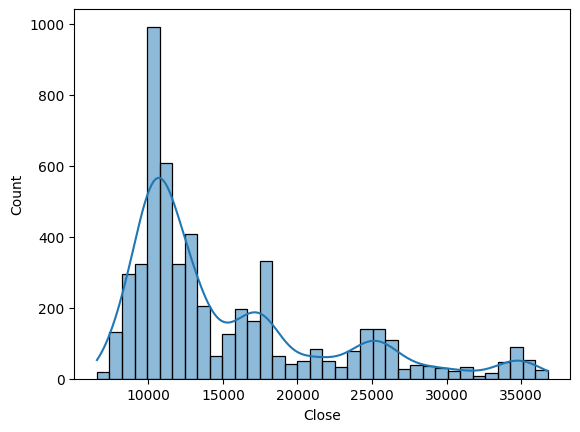

In [40]:
# Plot histogram
sns.histplot(data = DJI_df0['Close'], kde = True) 
plt.show()

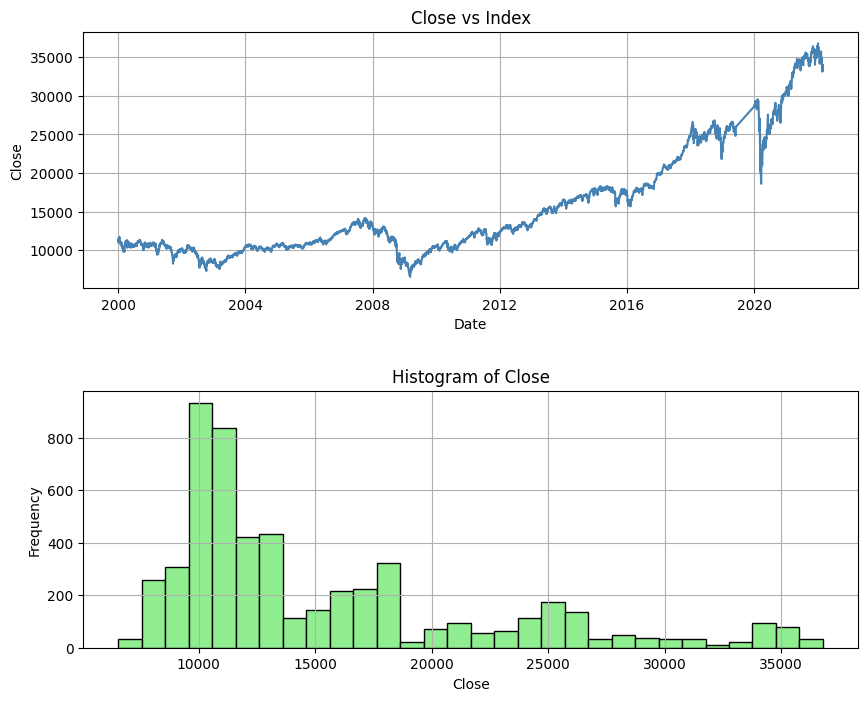

In [42]:
# Create subplots with 2 rows and 1 column
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot 'Close' vs index
axs[0].plot(DJI_df0.index, DJI_df0['Close'], color='steelblue')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close')
axs[0].set_title('Close vs Index')
axs[0].grid(True)

# Plot histogram for 'Close'
axs[1].hist(DJI_df0['Close'], bins=30, color='lightgreen', edgecolor='black')
axs[1].set_xlabel('Close')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Close')
axs[1].grid(True)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()

## 1. **Daily changes & % changes**

Here in this section, we will do our calculation in a copied dataframe, so that our original dataframe remain intact while doing these calculations for our future references.

Daily change  --> Daily Change = Current Value - Previous Value

- Current Value' represents the value of a data point at a specific time (e.g., the closing price of a stock on a particular day).
- Previous Value' represents the value of the same data point at the previous time (e.g., the closing price of the stock on the previous day).

In [43]:
#copying original dataframe

DJI_df = DJI_df0.copy()
DJI_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,11357.500000,11357.500000,11357.500000,11357.500000,11357.500000,0
2000-01-04,10997.900391,10997.900391,10997.900391,10997.900391,10997.900391,0
2000-01-05,11122.700195,11122.700195,11122.700195,11122.700195,11122.700195,0
2000-01-06,11253.299805,11253.299805,11253.299805,11253.299805,11253.299805,0
2000-01-07,11522.599609,11522.599609,11522.599609,11522.599609,11522.599609,0


In [44]:
# daily change = Open price - Closing price
# Calculate daily change
DJI_df['Daily Change'] = DJI_df['Close'].diff()

# Calculate percentage daily change
DJI_df['% Daily Change'] = DJI_df['Close'].pct_change() * 100

DJI_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Change,% Daily Change
Date,,,,,,,,
2000-01-03,11357.500000,11357.500000,11357.500000,11357.500000,11357.500000,0,NaN,NaN
2000-01-04,10997.900391,10997.900391,10997.900391,10997.900391,10997.900391,0,-359.599609,-3.166186
2000-01-05,11122.700195,11122.700195,11122.700195,11122.700195,11122.700195,0,124.799805,1.134760
2000-01-06,11253.299805,11253.299805,11253.299805,11253.299805,11253.299805,0,130.599609,1.174172
2000-01-07,11522.599609,11522.599609,11522.599609,11522.599609,11522.599609,0,269.299805,2.393074


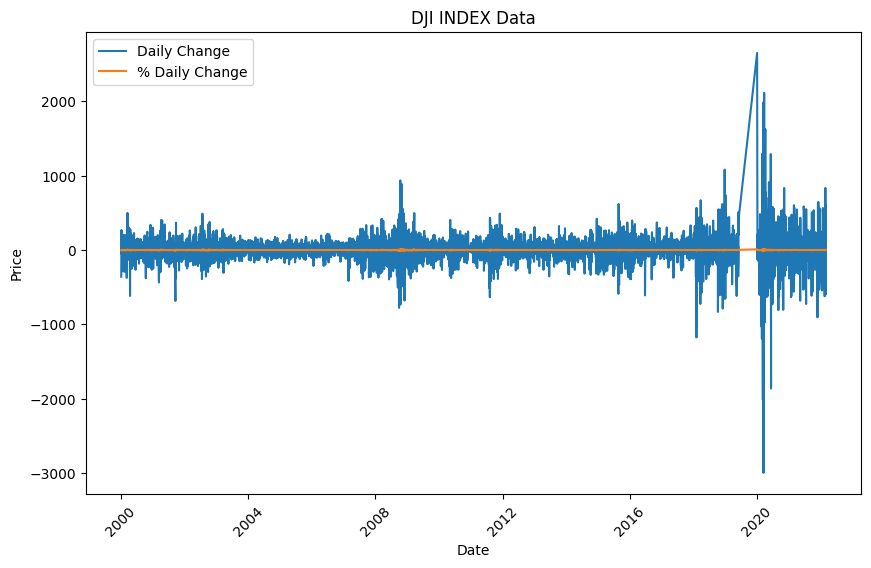

In [46]:
# If date is not datetime format then Convert the 'Date' column to datetime type using
# DJI_df['Date'] = pd.to_datetime(DJI_df['Date'])

# Set the figure size
plt.figure(figsize=(10, 6))

sns.lineplot(x='Date', y='Daily Change', data=DJI_df, label='Daily Change')
sns.lineplot(x='Date', y='% Daily Change', data=DJI_df, label='% Daily Change')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('DJI INDEX Data')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend()

# Show the plot
plt.show()